# Problem conversion

Moving from raw problem instance data to MCAPRTIF via pytables.

In [126]:
%load_ext autoreload
%autoreload 2

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import logging
logging.basicConfig(level=logging.INFO)

import os
sys.path.insert(0, os.path.abspath('../../'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np

In [261]:
from osmnx_network_extract.extract_mcarptif import NetworkExtract

In [280]:
network_file = '../../../hobbes_projects/wasted_large_instances/outputs/city_punggol_full_internal_50m_buffer.h5'
test_network = pd.read_csv('../../../hobbes_projects/wasted_large_instances/outputs/city_punggol_full_internal_50m_buffer_original_dataframe.csv')
test_network = test_network.drop(columns=['Unnamed: 0'])

/Users/ejwillemse/opt/anaconda3/envs/waste_labs_examples/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (14,17,19,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [117]:
sample = np.random.randint(0, test_network.shape[0], size=100)
req_arcs = test_network.iloc[sample, :].copy()
req_arcs = req_arcs.sort_values(['arc_index'])
req_arcs = req_arcs.drop_duplicates(['arc_id_ordered'])
req_arcs = req_arcs.dropna(subset=['geometry'])
req_arcs['geometry'] = req_arcs['geometry'].apply(wkt.loads)
req_arcs = gpd.GeoDataFrame(req_arcs, geometry=req_arcs['geometry'], crs='EPSG:4326')
req_arcs.to_csv('temp/test_extract.csv', index=False)

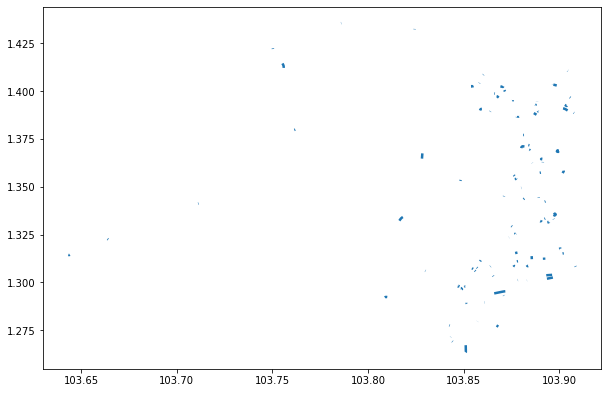

In [118]:
_ = req_arcs.plot(figsize=(10, 10), linewidth=2.5)

In [131]:
test_network.duplicated(['arc_index']).any()

False

In [282]:
network_info = NetworkExtract(test_network, network_file)

INFO:root:Creating inverse arc list
INFO:root:Number of edges: 19170
INFO:root:Edges with inverse pairs: 17799
INFO:root:Number of arcs: 17794


In [283]:
inv_list  = network_info.df_inv_list

In [284]:
inv_list_test = inv_list.copy().dropna()
inv_list_test.shape

(17799, 2)

In [285]:
inv_list_test['arc_index_inv'] = inv_list_test['arc_index_inv'].astype(int)

In [286]:
inv_list_test.loc[inv_list_test.duplicated(['arc_index'])]
inv_list_test.loc[inv_list_test.duplicated(['arc_index_inv'])]
inv_list_test.loc[~inv_list_test['arc_index'].isin(inv_list_test['arc_index_inv'])]
inv_list_test.loc[~inv_list_test['arc_index_inv'].isin(inv_list_test['arc_index'])]

,arc_index,arc_index_inv


,arc_index,arc_index_inv


,arc_index,arc_index_inv


,arc_index,arc_index_inv


In [145]:
for i, row in inv_list_test.iterrows():
    arc1, inv_arc1 = row[['arc_index', 'arc_index_inv']]
    arc2, inv_arc2 = inv_list_test.loc[inv_list_test['arc_index'] == inv_arc1].iloc[0][['arc_index', 'arc_index_inv']]
    assert arc1 == inv_arc2
    assert inv_arc1 == arc2

In [287]:
network_info.load_required_arcs(req_arcs)

In [288]:
req_arcs_full = req_arcs.merge(network_inv.edges_list, how='left')

AttributeError: 'NetworkExtract' object has no attribute 'edges_list'

In [198]:
req_arcs_full.loc[req_arcs_full['arc_index'].isin(req_arcs_full['arc_index_inv'])]
req_arcs_full.loc[req_arcs_full['arc_index_inv'].isin(req_arcs_full['arc_index'])]

,u_orig,v_orig,u,v,key,osmid,lanes,highway,service,oneway,...,width,arc_id,arc_id_orig,arc_id_ordered,arc_id_ordered_orig,parallel,index_right,Name,arc_index,arc_index_inv


,u_orig,v_orig,u,v,key,osmid,lanes,highway,service,oneway,...,width,arc_id,arc_id_orig,arc_id_ordered,arc_id_ordered_orig,parallel,index_right,Name,arc_index,arc_index_inv


In [199]:
og_list = req_arcs_full['arc_index']
inverse_list = req_arcs_full['arc_index_inv'].dropna()
full_list = pd.concat([og_list, inverse_list])
full_list = full_list.sort_values().astype(int).values

In [200]:
full_list

array([  692,   693,   893,  1594,  1960,  2146,  2250,  2347,  2484,
        2728,  2916,  3577,  3608,  3984,  4659,  4839,  4929,  4930,
        5072,  5625,  6709,  6815,  7010,  7041,  7145,  7461,  7648,
        8298,  8385,  8692,  8812,  8968,  9617,  9813, 10493, 11418,
       11601, 11604, 12058, 12061, 12587, 13166, 13259, 13393, 13449,
       13457, 13804, 13915, 13922, 14075, 14163, 14221, 14254, 14688,
       14777, 15248, 15328, 15412, 15486, 15487, 15605, 15761, 15795,
       16014, 16070, 16838, 16864, 16998, 17408, 17414, 17812, 17820,
       17888, 18337, 18661, 18680, 18871, 18878, 18969, 19460, 19583,
       19601, 19607, 19647, 19648, 20000, 20007, 20157, 20184, 20418,
       20419, 21179, 22684, 23036, 23037, 23259, 23393, 23411, 23419,
       23535, 23990, 24028, 24032, 24119, 24237, 24651, 24652, 25417,
       25458, 25463, 25466, 25471, 25530, 25570, 25714, 25764, 25879,
       25884, 25947, 26126, 26263, 26775, 26781, 27234, 27304, 27306,
       27382, 27426,

In [225]:
req_inv_list = pd.DataFrame({'arc_index': full_list, 'arc_index_inv': inv_list.iloc[full_list]['arc_index_inv'].values})

In [226]:
req_inv_list['req_arc_index'] = req_inv_list.index

In [227]:
req_inv_list_pure = req_inv_list[['req_arc_index', 'arc_index_inv']]
req_inv_list_pure.columns = ['req_arc_index_inv', 'arc_index']
req_inv_list_pure = req_inv_list_pure.dropna().astype(int)

In [228]:
req_inv_list_pure

,req_arc_index_inv,arc_index
0,0,693
1,1,692
7,7,7041
8,8,7145
10,10,7461
...,...,...
146,146,31778
147,147,26781
148,148,32448
149,149,32446


In [236]:
req_inv_list = req_inv_list.merge(req_inv_list_pure, how='left')
req_inv_list = req_inv_list.replace({np.nan: None})

In [249]:
req_inv_list_info = req_inv_list['req_arc_index_inv'].values